<a href="https://colab.research.google.com/github/neethu2602/DSA_Class_Activities-/blob/main/Assignment_NeethuMathew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
data=pd.read_csv('/content/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [90]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [91]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

In [94]:
def categorize(value):
    if value <= 4:
        return "Low"
    elif value <= 6:
        return "Medium"
    else:
        return "High"

data["quality_label"] = data["quality"].apply(categorize)


In [95]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [96]:
X = data.drop(columns=["quality", "quality_label"])
y = data["quality_label"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train_scaled,y_train)
y_pred=logit_model.predict(X_test_scaled)

In [100]:
print('Accuracyis: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred,average='micro'))
print('recall: ',recall_score(y_test,y_pred,average='micro'))



Accuracyis:  0.828125
precision:  0.828125
recall:  0.828125


In [101]:
confusion_matrix(y_test,y_pred)

array([[ 13,   0,  34],
       [  0,   0,  11],
       [ 10,   0, 252]])

In [102]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train_scaled,y_train)
  y_pred=classifier.predict(X_test_scaled)
  acc= accuracy_score(y_test,y_pred)
  metric_k.append(acc)

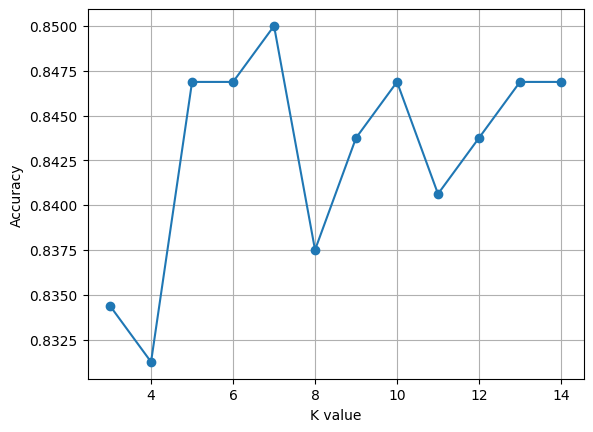

In [103]:
import matplotlib.pyplot as plt

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [104]:
classifier = KNeighborsClassifier(n_neighbors=7, metric='manhattan')

classifier.fit(X_train_scaled,y_train)
y_predknn=classifier.predict(X_test_scaled)

In [105]:
print('Accuracyis: ',accuracy_score(y_test,y_predknn))
print('precision: ',precision_score(y_test,y_predknn,average='macro'))
print('recall: ',recall_score(y_test,y_predknn,average='macro'))

Accuracyis:  0.840625
precision:  0.5021796916533758
recall:  0.46445779871149373


In [106]:
print('Accuracyis: ',accuracy_score(y_test,y_predknn))
print('precision: ',precision_score(y_test,y_predknn,average='weighted'))
print('recall: ',recall_score(y_test,y_predknn,average='weighted'))

Accuracyis:  0.840625
precision:  0.8059220494417862
recall:  0.840625


In [107]:
confusion_matrix(y_test,y_predknn)

array([[ 21,   0,  26],
       [  0,   0,  11],
       [ 12,   2, 248]])

In [115]:
new_wine = np.array([[7.4,0.42,0.11,1.4,0.075,10.0,25.0,0.99560,2.38,0.52,7.50]])

feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]
new_wine_df = pd.DataFrame(new_wine,columns=feature_names)

new_wine_scaled = scaler.transform(new_wine_df)


print("Logistic Regression Prediction:", logit_model.predict(new_wine_scaled)[0])


print("KNN Prediction:", classifier.predict(new_wine_scaled)[0])

Logistic Regression Prediction: Medium
KNN Prediction: Medium
